# revisit Michael's code for croco and with pands and xarray tools

In [1]:
from matplotlib import pyplot as plt

%matplotlib inline

import crocosi.postp as pp

/opt/anaconda3/envs/croco/lib/python3.7/site-packages/distributed/utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 51] Network is unreachable
  RuntimeWarning,


---

## single run

In [5]:
root_path = '/Users/zcaspar/'
#run = 'jet_cfg1_wp9_4km_0a2000j/'
run = 'jet_cfg1_wp75_4km_1500a2000j_floats_lev50_itide/'
#file='t1/file_his_00010101-00010125.nc'
#File='t1'
gparams = {'f0': 1.0313e-4, 'beta': 1.6186e-11}
r = pp.CROCOrun(root_path+run, prefix='file_', open_nc=['his'], grid_params=gparams)

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, s_rho: 50, time: 20, x_rho: 258, x_u: 257, x_v: 258, x_w: 258, y_rho: 722, y_u: 722, y_v: 721, y_w: 722)
Coordinates:
    nav_lon_rho          (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    nav_lat_rho          (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    nav_lon_v            (y_v, x_v) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    nav_lat_v            (y_v, x_v) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    nav_lat_u            (y_u, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    nav_lon_u            (y_u, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    nav_lon_w            (y_w, x_w) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    nav_lat_w            (y_w, x_w) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
  * s_rho                (s_rho) float32 -0.99 -0.97 -0.95 ...

In [10]:
f=nc.Dataset(root_path+run+file)

In [13]:
f

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: file_his
    description: Created by xios
    title: Created by xios
    Conventions: CF-1.5
    production: An IPSL model
    timeStamp: 2019-Nov-05 09:11:44 GMT
    dimensions(sizes): axis_nbounds(2), x_rho(258), y_rho(722), s_rho(50), x_u(257), y_u(722), x_v(258), y_v(721), x_w(258), y_w(722), time_counter(1)
    variables(dimensions): float32 nav_lat_rho(y_rho,x_rho), float32 nav_lon_rho(y_rho,x_rho), float32 s_rho(s_rho), float32 nav_lat_u(y_,x_), float32 nav_lon_u(y_,x_), float32 nav_lat_v(y_v,x_v), float32 nav_lon_v(y_v,x_v), float32 nav_lat_w(y_w,x_w), float32 nav_lon_w(y_w,x_w), float32 ssh_a(time_counter,y_rho,x_rho), float64 time_instant(time_counter), float64 time_instant_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 T_a(time_counter,s_rho,y_rho,x_rho), float32 u_a(time_counter,s_rho,y_,x_), 

In [8]:
r['']

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, s_rho: 50, s_w: 51, time: 20, x_rho: 258, x_u: 257, y_rho: 722, y_v: 721)
Coordinates:
    eta_v                (y_v, x_rho) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    eta_rho              (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    xi_v                 (y_v, x_rho) float32 dask.array<chunksize=(721, 258), meta=np.ndarray>
    eta_u                (y_rho, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
    eta_w                (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    xi_w                 (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    xi_rho               (y_rho, x_rho) float32 dask.array<chunksize=(722, 258), meta=np.ndarray>
    xi_u                 (y_rho, x_u) float32 dask.array<chunksize=(722, 257), meta=np.ndarray>
  * s_rho                (s_rho) float32 -0.99 -0.97 -0.95 ... -0.05 -0.03 -0

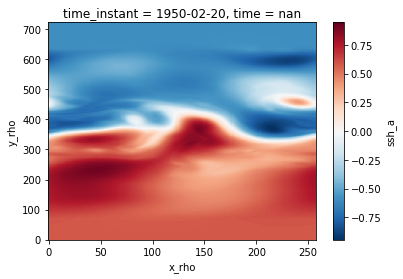

In [45]:
# chunking is not appropriate for inst
# one should be able to pass an option to CROCOrun in order to control chunks
#r['his'].u_a.isel(y_rho=350).plot(xlim=[2000,2050])
r['his'].ssh_a.isel(time=1).plot()

In [51]:
#r['his'].u_a.isel(x_u=125).plot(x='time', y='eta_u')
t=r['his'].time_instant
print(t)

<xarray.DataArray 'time_instant' (time: 20)>
dask.array<concatenate, shape=(20,), dtype=datetime64[ns], chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    time_instant  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) float64 1.5e+03 nan nan nan nan ... nan nan nan nan nan
Attributes:
    standard_name:  time
    long_name:      Time axis
    time_origin:    1950-01-01 00:00:00
    bounds:         time_instant_bounds


In [55]:
r['his'].ssh_a.isel(x_rho=125).coords

Coordinates:
    xi_w          (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    xi_rho        (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    eta_w         (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    eta_rho       (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>
    time_instant  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time          (time) float64 1.5e+03 nan nan nan nan ... nan nan nan nan nan
    f             (y_rho) float32 dask.array<chunksize=(722,), meta=np.ndarray>

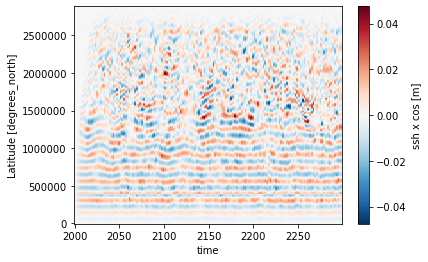

In [7]:
r['ave'].ssh_t_cos.isel(x_rho=125).plot(x='time', y='eta_rho')

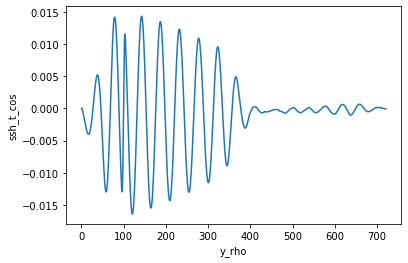

In [56]:
r['his'].ssh_t_cos.mean(['time','x_rho']).plot()

---

## logged statistics

In [57]:
r.stats.head()

,STEP,KINETIC_ENRG,POTEN_ENRG,TOTAL_ENRG,NET_VOLUME,trd,ENSTROPHY,BTKIN_ENRG
time[DAYS],,,,,,,,
1500.00000,432000.0,0.012444,531.16820,531.18064,1.179650e+16,0.0,5.985666e-19,0.011175
1500.03472,432010.0,0.012444,531.16819,531.18064,1.179650e+16,0.0,5.984934e-19,0.011174
1500.06944,432020.0,0.012444,531.16819,531.18063,1.179650e+16,0.0,5.984264e-19,0.011174
1500.10417,432030.0,0.012444,531.16818,531.18062,1.179650e+16,0.0,5.983648e-19,0.011173
1500.13889,432040.0,0.012444,531.16818,531.18062,1.179650e+16,0.0,5.983078e-19,0.011173


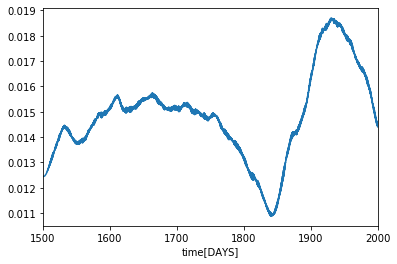

In [58]:
r.stats['KINETIC_ENRG'].plot()

In [59]:
r.params

{'dt': 300.0,
 'theta_s': 5.0,
 'theta_b': 0.0,
 'Hc': 100.0,
 'rho0': 1000.0,
 'y_itide': 400000.0,
 'jet_ywidth': 800000.0,
 'jet_weight': 0.75,
 'omega': 0.000145444104333}

---

## process multiple runs

In [60]:
runs = []
runs += ['jet_cfg1_wp5_4km_0a2000j']
runs += ['jet_cfg1_wp6_4km_0a2000j']
runs += ['jet_cfg1_wp8_4km_0a2000j']
runs += ['jet_cfg1_wp9_4km_0a2000j']
R = [pp.CROCOrun(root_path+run, prefix='file_', open_nc=['ave']) for run in runs]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zcaspar/jet_cfg1_wp5_4km_0a2000j'

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


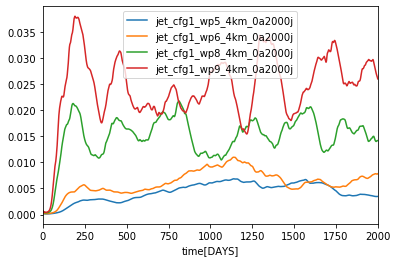

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
for r, cfg in zip(R,runs):
    r.stats['KINETIC_ENRG'].plot(ax=ax, label=cfg)
plt.legend()